<a href="https://colab.research.google.com/github/AgapovDP/GPNN/blob/main/GPNN_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test img

In [1]:
!git clone https://github.com/AgapovDP/GPNN.git

fatal: destination path 'GPNN' already exists and is not an empty directory.


In [2]:

from GPNN.GPNN import GPNN_v1
import numpy as np
import random
import matplotlib.pyplot as plt
from torch import nn,manual_seed,from_numpy, split, tensor
import torch.optim as optim
import torch
import time
import os
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn.functional as F
import matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
DataNPY = np.load("/content/gdrive/MyDrive/Data_art_NN/Datasets/OpenDataset_10k_noNoise.npy",allow_pickle=True)

In [5]:
loadedModel = GPNN_v1()
loadedModel.load_state_dict(torch.load('/content/GPNN/Example/TrainedGPNN_openDataset',map_location=torch.device('cpu')))
loadedModel.eval()
loadedModel.float()

GPNN_v1(
  (embedding_stack): Sequential(
    (0): Linear(in_features=5, out_features=200, bias=False)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=200, out_features=2000, bias=False)
    (4): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=2000, out_features=4000, bias=False)
    (7): BatchNorm1d(4000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=4000, out_features=700, bias=False)
    (10): BatchNorm1d(700, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
  (regression_stack): Sequential(
    (0): Linear(in_features=700, out_features=1500, bias=False)
    (1): BatchNorm1d(1500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=1500, out_features=700, bias=False)
   

In [6]:
class GPDataset(Dataset):
    def __init__(self, GPdata):
      self.nanToken = 10.
      self.GPdata = []
      for obj in tqdm(GPdata):
        self.GPdata.append((tensor(obj[0]),tensor(obj[1]),tensor(obj[2])))

    def __len__(self):
      return len(self.GPdata)

    def __getitem__(self, idx):
      return self.GPdata[idx][0],self.GPdata[idx][1],self.GPdata[idx][2]


In [7]:
lenTestData = 5000
lenTrainData = 5000
batch_size = 500

testDatasets = GPDataset(DataNPY[:lenTestData])
trainDatasets = GPDataset(DataNPY[lenTestData:lenTestData+lenTrainData])

testDataloader = DataLoader(testDatasets, batch_size=batch_size, shuffle=False, num_workers=2)
trainDataloader = DataLoader(trainDatasets, batch_size=batch_size, shuffle=True, num_workers=2)

100%|██████████| 5000/5000 [00:00<00:00, 22726.16it/s]


In [8]:
localData = next(iter(trainDataloader))
obj = localData[0][0:64]

In [9]:
oneDimg = []
resultGPNN = loadedModel(obj, mod = 'classifier')
for step in range(64):
  if resultGPNN[0].reshape(-1).detach().round()[step] == 1 and resultGPNN[1].reshape(-1).detach().round()[step] == 0 \
    and resultGPNN[2].reshape(-1).detach().round()[step] == 0 and resultGPNN[3].reshape(-1).detach().round()[step] == 0:
    oneDimg.append(1)
  elif resultGPNN[0].reshape(-1).detach().round()[step] == 0 and resultGPNN[1].reshape(-1).detach().round()[step] == 1 \
    and resultGPNN[2].reshape(-1).detach().round()[step] == 0 and resultGPNN[3].reshape(-1).detach().round()[step] == 0:
    oneDimg.append(2)
  elif resultGPNN[0].reshape(-1).detach().round()[step] == 0 and resultGPNN[1].reshape(-1).detach().round()[step] == 0 \
    and resultGPNN[2].reshape(-1).detach().round()[step] == 1 and resultGPNN[3].reshape(-1).detach().round()[step] == 0:
    oneDimg.append(3)
  elif resultGPNN[0].reshape(-1).detach().round()[step] == 0 and resultGPNN[1].reshape(-1).detach().round()[step] == 0 \
    and resultGPNN[2].reshape(-1).detach().round()[step] == 0 and resultGPNN[3].reshape(-1).detach().round()[step] == 1:
    oneDimg.append(4)
  else:
    oneDimg.append(5)






In [10]:
oneDimg_base = []
vhod = localData[1][0:64].T
for step in range(64):
  if vhod[0].reshape(-1).detach().round()[step] == 1 and vhod[1].reshape(-1).detach().round()[step] == 0 \
    and vhod[2].reshape(-1).detach().round()[step] == 0 and vhod[3].reshape(-1).detach().round()[step] == 0:
    oneDimg_base.append(1)
  elif vhod[0].reshape(-1).detach().round()[step] == 0 and vhod[1].reshape(-1).detach().round()[step] == 1 \
    and vhod[2].reshape(-1).detach().round()[step] == 0 and vhod[3].reshape(-1).detach().round()[step] == 0:
    oneDimg_base.append(2)
  elif vhod[0].reshape(-1).detach().round()[step] == 0 and vhod[1].reshape(-1).detach().round()[step] == 0 \
    and vhod[2].reshape(-1).detach().round()[step] == 1 and vhod[3].reshape(-1).detach().round()[step] == 0:
    oneDimg_base.append(3)
  elif vhod[0].reshape(-1).detach().round()[step] == 0 and vhod[1].reshape(-1).detach().round()[step] == 0 \
    and vhod[2].reshape(-1).detach().round()[step] == 0 and vhod[3].reshape(-1).detach().round()[step] == 1:
    oneDimg_base.append(4)
  else:
    oneDimg_base.append(5)

In [11]:

n=8
m=8
c=0
B=[[0]*m for i in range (n)]
for i in range (n):
         for j in range (m):
                B[i][j]=oneDimg[c]
                c+=1


[[3, 1, 3, 4, 1, 2, 2, 2],
 [4, 5, 3, 4, 3, 1, 2, 3],
 [4, 3, 4, 5, 2, 2, 3, 3],
 [4, 3, 2, 4, 4, 3, 1, 2],
 [1, 2, 1, 3, 2, 4, 4, 2],
 [3, 3, 4, 2, 4, 2, 1, 2],
 [1, 4, 3, 4, 4, 1, 1, 2],
 [3, 4, 4, 3, 3, 4, 4, 5]]

In [12]:
n=8
m=8
c=0
B_vhod=[[0]*m for i in range (n)]
for i in range (n):
         for j in range (m):
                B_vhod[i][j]=oneDimg_base[c]
                c+=1

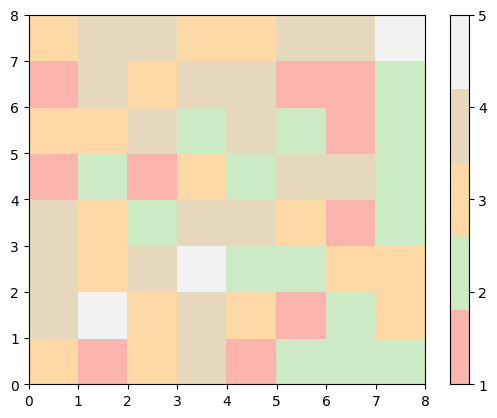

In [13]:
np.random.seed(123)
vals = np.random.randint(10, size=(7, 7))
plt.pcolor(B, cmap=plt.get_cmap('Pastel1',5), )
plt.colorbar(ticks=[1,2,3,4,5])

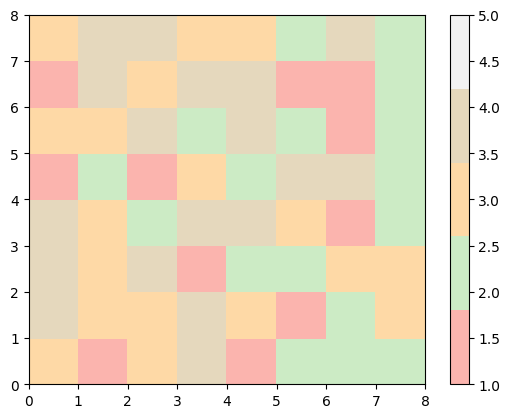

In [14]:
np.random.seed(123)
vals = np.random.randint(10, size=(7, 7))
plt.pcolor(B_vhod, cmap=plt.get_cmap('Pastel1',5), )
plt.colorbar()
plt.clim(1, 5)